<a href="https://colab.research.google.com/github/sudhirshahu51/Pytorch_Codes/blob/main/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Object Detection](https://www.youtube.com/watch?v=AOosZVrTUbQ)

[github link](https://github.com/AarohiSingla/pytorch-for-deep-learning/blob/main/Lecture_6/Object_detection_pretrained.ipynb)

In [ ]:
!pip install torchvision

In [ ]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn
object_detection_model = fasterrcnn_resnet50_fpn(pretrained = True, progress = True)
object_detection_model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
object_detection_model.eval(); ## Setting Model for Evaluation/Prediction

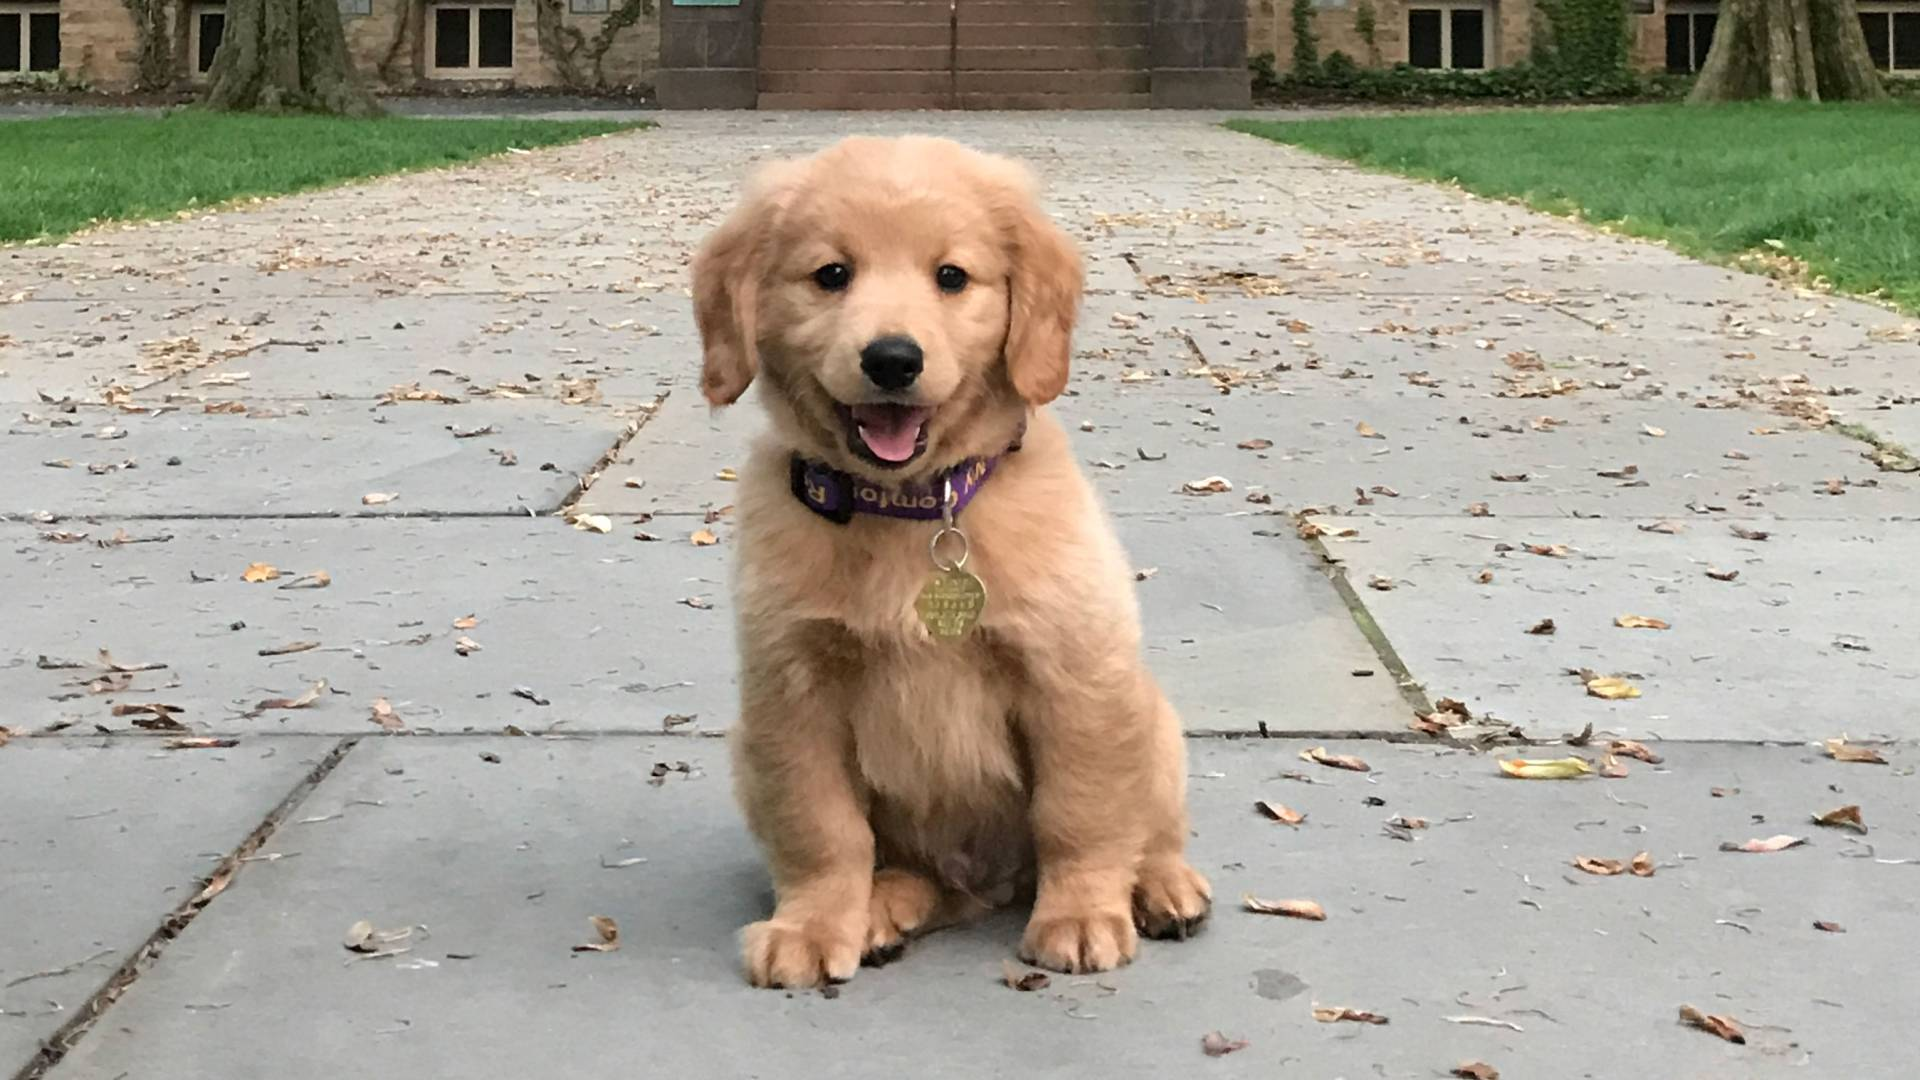

In [ ]:
from PIL import Image

path = "/content/drive/MyDrive/Colab Notebooks/Deep Learning Pytorch/data/dog.jpg"
test_img = Image.open(path)

test_img

#**Convert Pillow Images to Torch Tensors**

In [ ]:
import torchvision.transforms as transforms

# Load the image

test_img =  Image.open(path)

#Define the tranformation - convert image to tensor

transform = transforms.Compose([
    transforms.ToTensor(),
    ])

#Apply the tranformation to the image
test_img_tensor = transform(test_img)
test_img_tensor

tensor([[[0.1059, 0.0980, 0.0941,  ..., 0.0980, 0.1255, 0.1490],
         [0.1373, 0.1255, 0.1176,  ..., 0.1373, 0.1608, 0.1765],
         [0.1922, 0.1843, 0.1765,  ..., 0.2039, 0.2235, 0.2392],
         ...,
         [0.6510, 0.6510, 0.6549,  ..., 0.7451, 0.7490, 0.7529],
         [0.6549, 0.6549, 0.6588,  ..., 0.7451, 0.7490, 0.7529],
         [0.6588, 0.6588, 0.6588,  ..., 0.7451, 0.7490, 0.7529]],

        [[0.0784, 0.0706, 0.0667,  ..., 0.0745, 0.1020, 0.1255],
         [0.1098, 0.1020, 0.0902,  ..., 0.1137, 0.1373, 0.1529],
         [0.1686, 0.1608, 0.1529,  ..., 0.1804, 0.2000, 0.2157],
         ...,
         [0.6588, 0.6588, 0.6549,  ..., 0.7529, 0.7569, 0.7608],
         [0.6627, 0.6627, 0.6588,  ..., 0.7529, 0.7569, 0.7608],
         [0.6667, 0.6667, 0.6588,  ..., 0.7529, 0.7569, 0.7608]],

        [[0.0392, 0.0314, 0.0275,  ..., 0.0275, 0.0549, 0.0784],
         [0.0706, 0.0549, 0.0510,  ..., 0.0667, 0.0902, 0.1059],
         [0.1216, 0.1059, 0.1059,  ..., 0.1255, 0.1451, 0.

In [ ]:
test_img_tensor.shape

torch.Size([3, 1080, 1920])

#**Add Batch Dimesnion**

In [ ]:
# We added this dimension because models work on batches of images.
test_img_tensor =  test_img_tensor.unsqueeze(dim = 0)
test_img_tensor.shape

torch.Size([1, 3, 1080, 1920])

#**Prediction**

In [ ]:
preds = object_detection_model(test_img_tensor)
preds

In [ ]:
preds

[{'boxes': tensor([[ 696.3580,  125.7184, 1214.3313,  998.0112],
          [1498.4038,  753.0292, 1600.1317,  779.2209],
          [ 714.3624,  287.9554, 1241.0366, 1002.7324],
          [1504.4083,  740.9623, 1615.9750,  775.0946]],
         grad_fn=<StackBackward0>),
  'labels': tensor([18, 52, 23, 52]),
  'scores': tensor([0.9985, 0.5093, 0.1626, 0.0658], grad_fn=<IndexBackward0>)}]

#**Visualize Results**

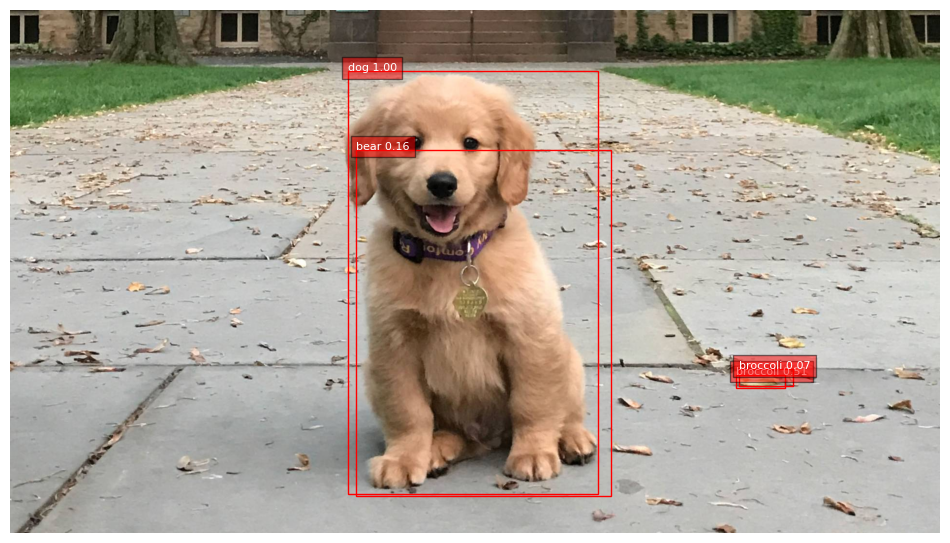

In [ ]:
#COCO dataset class labels(commonly used for pre-trained models)
COCO_INSTANCE_CATEGORY_NAMES = [
    '','__background__','person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
    'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
    'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
    'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
    'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


#Visualization with class names
import matplotlib.pyplot as plt
import matplotlib.patches as patches

#convert tensor image back to numpy for visualization
img =  test_img_tensor.squeeze().detach().cpu().numpy()
img = img.transpose(1,2,0) #rearrage the dimensions from CxHxW to HxWxC for image display

#Create figure and axes
fig, ax = plt.subplots(1, figsize=(12,9))

#Display the image
ax.imshow(img)

# Add bounding boxes and labels
for box, label, score in zip(preds[0]['boxes'], preds[0]['labels'], preds[0]['scores']):
  x1, y1, x2, y2 = box.detach().cpu().numpy() #Make sure to detach and convert boxes as well
  label_name  = COCO_INSTANCE_CATEGORY_NAMES[label.item()]
  rect = patches.Rectangle((x1,y1), x2 - x1, y2 -y1, linewidth = 1, edgecolor = 'r', facecolor = 'none')
  ax.add_patch(rect)
  plt.text(x1,y1, f'{label_name} {score.item():.2f}', color = 'white', fontsize = 8, bbox = dict(facecolor = 'red', alpha = 0.5))

plt.axis('off')   #to turn off axes for better visualization
plt.show()



tensor(0.9985, grad_fn=<UnbindBackward0>)


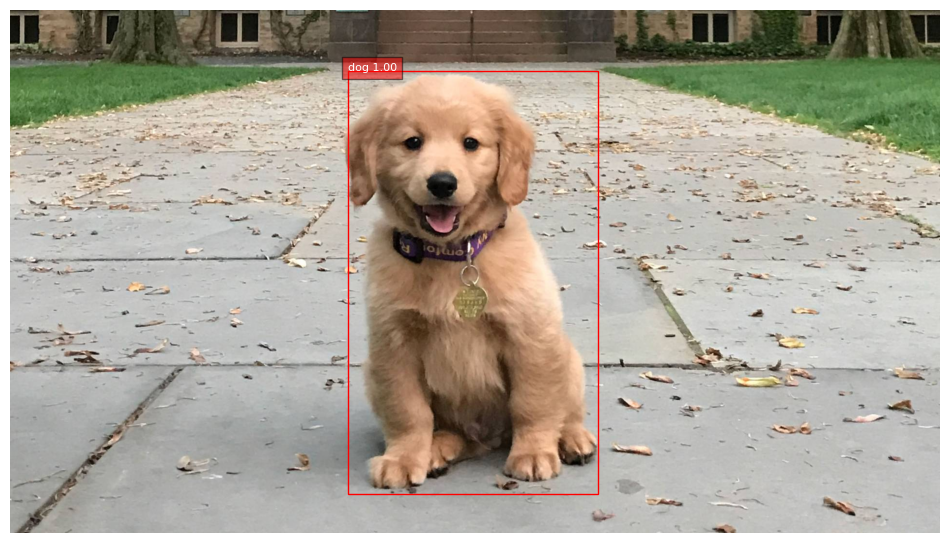

In [ ]:
#Visualization with class names
import matplotlib.pyplot as plt
import matplotlib.patches as patches

#Set a threshold for displying predictions
confidence_threshold = 0.8

#convert tensor image back to numpy for visualization
img =  test_img_tensor.squeeze().detach().cpu().numpy()
img = img.transpose(1,2,0) #rearrage the dimensions from CxHxW to HxWxC for image display

#Create figure and axes
fig, ax = plt.subplots(1, figsize=(12,9))

#Display the image
ax.imshow(img)

# Add bounding boxes and labels
for box, label, score in zip(preds[0]['boxes'], preds[0]['labels'], preds[0]['scores']):
  if score.item() > confidence_threshold:
    x1, y1, x2, y2 = box.detach().cpu().numpy() #Make sure to detach and convert boxes as well
    label_name  = COCO_INSTANCE_CATEGORY_NAMES[label.item()]
    rect = patches.Rectangle((x1,y1), x2 - x1, y2 -y1, linewidth = 1, edgecolor = 'r', facecolor = 'none')
    ax.add_patch(rect)
    plt.text(x1,y1, f'{label_name} {score.item():.2f}', color = 'white', fontsize = 8, bbox = dict(facecolor = 'red', alpha = 0.5))

plt.axis('off')   #to turn off axes for better visualization
plt.show()

In [ ]:
car = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}

In [ ]:
car.item()

AttributeError: 'dict' object has no attribute 'item'